In [1]:
import math

def classifyAPoint(points,p,k=3):
	'''
	This function finds the classification of p using
	k nearest neighbor algorithm. It assumes only two
	groups and returns 0 if p belongs to group 0, else
	1 (belongs to group 1).

	Parameters -
		points: Dictionary of training points having two keys - 0 and 1
				Each key have a list of training data points belong to that

		p : A tuple, test data point of the form (x,y)

		k : number of nearest neighbour to consider, default is 3
	'''

	distance=[]
	for group in points:
		for feature in points[group]:

			#calculate the euclidean distance of p from training points
			euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2)

			# Add a tuple of form (distance,group) in the distance list
			distance.append((euclidean_distance,group))

	# sort the distance list in ascending order
	# and select first k distances
	distance = sorted(distance)[:k]

	freq1 = 0 #frequency of group 0
	freq2 = 0 #frequency og group 1

	for d in distance:
		if d[1] == 0:
			freq1 += 1
		elif d[1] == 1:
			freq2 += 1

	return 0 if freq1>freq2 else 1

# driver function
def main():

	# Dictionary of training points having two keys - 0 and 1
	# key 0 have points belong to class 0
	# key 1 have points belong to class 1

	points = {0:[(1,12),(2,5),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)],
			1:[(5,3),(3,2),(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]}

	# testing point p(x,y)
	p = (2.5,7)

	# Number of neighbours
	k = 3

	print("The value classified to unknown point is: {}".\
		format(classifyAPoint(points,p,k)))

if __name__ == '__main__':
	main()


The value classified to unknown point is: 0


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df = pd.read_csv("prostate.csv")
df.head()


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('Target', axis=1))
scaled_features = scaler.transform(df.drop('Target',
										axis=1))

df_feat = pd.DataFrame(scaled_features,
					columns=df.columns[:-1])
df_feat.head()


,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-1.587021,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.510513,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


In [ ]:
from sklearn.metrics import classification_report,\
	confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test,\
	y_train, y_test = train_test_split(scaled_features,
									df['Target'],
									test_size=0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will Target or not.
# We'll start with k = 1.

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[20  2]
 [ 5  3]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.60      0.38      0.46         8

    accuracy                           0.77        30
   macro avg       0.70      0.64      0.66        30
weighted avg       0.75      0.77      0.75        30



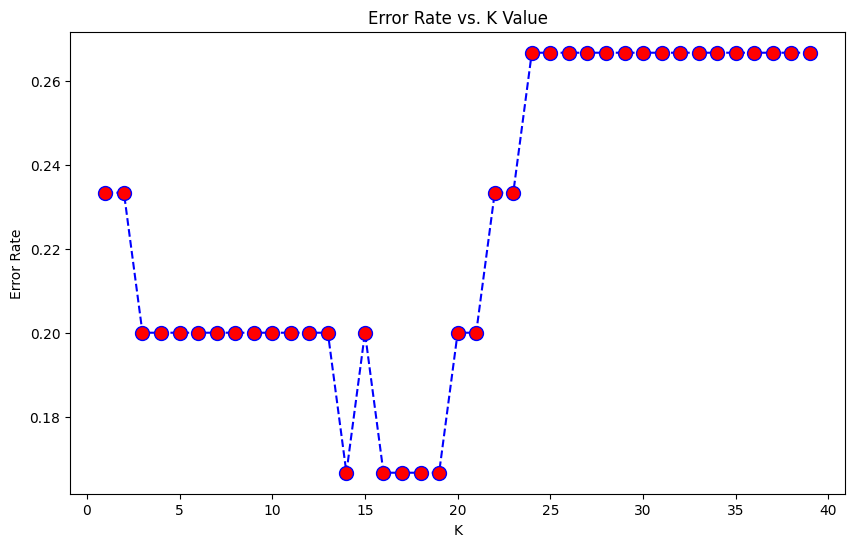

In [ ]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 1
Confusion Matrix
[[20  2]
 [ 5  3]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.60      0.38      0.46         8

    accuracy                           0.77        30
   macro avg       0.70      0.64      0.66        30
weighted avg       0.75      0.77      0.75        30



In [ ]:
# NOW WITH K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))


WITH K = 10
Confusion Matrix
[[21  1]
 [ 5  3]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.75      0.38      0.50         8

    accuracy                           0.80        30
   macro avg       0.78      0.66      0.69        30
weighted avg       0.79      0.80      0.78        30



In [1]:
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

NameError: name 'accuracy_score' is not defined